In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('cars.csv')

# Display the first few rows of the dataset
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [6]:
# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

In [7]:
# Convert columns in horsepower to numeric values and remove '?'.
data['horsepower'] = data['horsepower'].apply(pd.to_numeric, errors='coerce')

In [8]:
# Drop rows with missing values
data.dropna(inplace=True)

In [11]:
# Defines target variable: Fuel Efficiency
threshold_mpg = data['mpg'].median()
data['fuel_efficient'] = (data['mpg'] >= threshold_mpg).astype(int)

In [12]:
# Selects features and target variable
features = ['displacement', 'horsepower', 'weight']
X = data[features]
y = data['fuel_efficient']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the logistic regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# Predict on the test set
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8987341772151899


In [17]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion Matrix for fuel-efficiancy model')

<Figure size 1000x400 with 0 Axes>

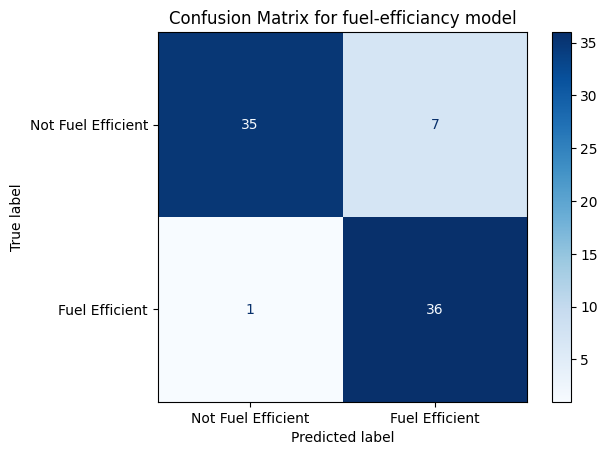

In [25]:
# Plot confusion matrix
plt.figure(figsize=(10, 4))
ConfusionMatrixDisplay(cm, display_labels=['Not Fuel Efficient', 'Fuel Efficient']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for fuel-efficiancy model')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

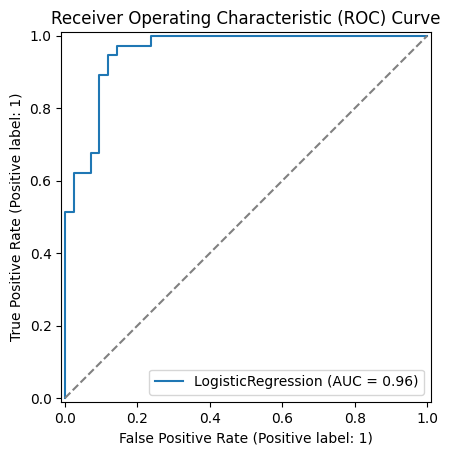

In [26]:
# Plot ROC curve
roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
print(roc_display)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')